# Hypothesis: Countries who prioritize education spending will have a larger percentage of their children start primary school.

I will use the percentage of government expenditure used on education (SE.XPD.TOTL.GB.ZS) as my independent variable, and the percentage of the school age population that begins the first grade (SE.PRM.GINT.ZS) as my dependent variable for my regression analysis.

SE.XPD.TOTL.GB.ZS - General government expenditure on education (current, capital, and transfers) is expressed as a percentage of total general government expenditure on all sectors (including health, education, social services, etc.). It includes expenditure funded by transfers from international sources to government. General government usually refers to local, regional and central governments.


SE.PRM.GINT.ZS - Gross intake ratio in first grade of primary education is the number of new entrants in the first grade of primary education regardless of age, expressed as a percentage of the population of the official primary entrance age.  Because the gross intake ratio includes all new entrants regardless of age, it can exceed 100 percent in some situations, such as immediately after fees have been abolished or when the number of reenrolled children is large.

We will be exploring for a coorelation betwen two indicators that are given named constants below.  This first cell will also establish the _author_ variable and import the pandas library as pd.

In [8]:
__author__ = "730366999"
INDICATOR_1: str = "SE.XPD.TOTL.GB.ZS"
INDICATOR_2: str = "SE.PRM.GINT.ZS"

import pandas as pd

We will us pandas read_csv method to the read databank_education_2018.csv file from our data directory and return a pandas DataFrame object that will be pointed to by the variable data_table.

In [10]:
data_table = pd.read_csv("../../data/databank_education_2018.csv")

Here we use the shape attribute to display the geometry of our DataFrame object (number of rows and columns) and the head method to see a preview of the first 10 rows of our table.  There are 94 columns in our data_table object, and 244 rows.  The output shown below in the Jupyter notebook doesn't let you see all the columns.

In [12]:
print(data_table.shape)
data_table.head(10)

(244, 94)


,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


We will create a new pandas DataFrame by indexing data_table with a list of the columns that we want to be in the new DataFrame, and assign this new object to the selected_data variable.  The list of columns we use contains the string "Country" and our two named constants set up in the first code cell.  Then we will preview the first 10 rows.

In [13]:
selected_data = data_table[["Country", INDICATOR_1, INDICATOR_2]]
selected_data.head(10)


,Country,SE.XPD.TOTL.GB.ZS,SE.PRM.GINT.ZS
0,Afghanistan,NaN,110.77532
1,Albania,NaN,109.09234
2,Algeria,NaN,101.88002
3,Andorra,19.323059,NaN
4,Angola,NaN,NaN
5,Antigua and Barbuda,NaN,98.51904
6,Arab World,NaN,96.21463
7,Argentina,NaN,NaN
8,Armenia,NaN,91.89196
9,Aruba,NaN,NaN


We will use the notna method to build a new DataFrame that contains only the rows from selected_data that have numbers in both of the indicator columns that we have selected.  This new DataFrame will be pointed to by the variable complete_data.  We print the output of the shape method to see how many rows of data we have left with both values populated, and then use the head method to display the first 10 rows of the complete_data DataFrame object.

In [14]:
complete_data = selected_data[selected_data[INDICATOR_1].notna() & selected_data[INDICATOR_2].notna()]
print(complete_data.shape)
complete_data.head(10)


(52, 3)


,Country,SE.XPD.TOTL.GB.ZS,SE.PRM.GINT.ZS
12,Azerbaijan,7.435460,94.85142
19,Belize,21.365290,98.49042
20,Benin,17.709181,146.92009
22,Bhutan,22.766460,105.14864
30,Burkina Faso,22.661169,111.09734
31,Burundi,19.919870,128.05538
33,Cambodia,8.838980,104.57965
34,Cameroon,16.883160,116.76714
36,Caribbean small states,18.584000,89.93744
42,Colombia,15.982620,113.54630


We will use the complete_data DataFrames sort_values method to produce a new DataFrame object that has the rows sorted in descending order by one of the indicators.  The variable sorted_data will point to this.

In [15]:
sorted_data = complete_data.sort_values(by = INDICATOR_1, ascending = False)
sorted_data.head(10)

,Country,SE.XPD.TOTL.GB.ZS,SE.PRM.GINT.ZS
193,Sierra Leone,32.473221,171.84957
46,Costa Rica,26.086670,110.77016
84,Guatemala,23.749540,105.26949
22,Bhutan,22.766460,105.14864
30,Burkina Faso,22.661169,111.09734
221,Togo,21.769091,141.65741
190,Senegal,21.529409,94.74565
19,Belize,21.365290,98.49042
218,Tanzania,20.560011,109.14532
31,Burundi,19.919870,128.05538


We will use pandas to produce a scatter plot of INDICATOR_1 vs INDICATOR_2.

<AxesSubplot:xlabel='SE.XPD.TOTL.GB.ZS', ylabel='SE.PRM.GINT.ZS'>

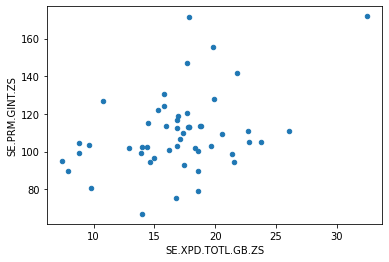

In [16]:
sorted_data.plot.scatter(x=INDICATOR_1, y=INDICATOR_2)


In this cell we will extract the two data columns from the DataFrame object as Series objects, and then use the Series method to see how well the correlate to eachother.

In [17]:
left_column = sorted_data[INDICATOR_1]
right_column = sorted_data[INDICATOR_2]

print(f"the correlation between percentage of governent expenditure on education, and percentage of kids starting first grade {right_column.corr(left_column)}")



the correlation between percentage of governent expenditure on education, and percentage of kids starting first grade 0.4020483769528363


going to try to find the best correlations

In [19]:
# results: list[float] = []
for label in data_table.columns:
    if (label != "Country") & (label != INDICATOR_1):
        selected_data = data_table[["Country", INDICATOR_1, label]]
        complete_data = selected_data[selected_data[INDICATOR_1].notna() & selected_data[label].notna()]
        sorted_data = complete_data.sort_values(by = INDICATOR_1, ascending = False)
        left_column = sorted_data[INDICATOR_1]
        right_column = sorted_data[label]
        print(f"For {INDICATOR_1} vs {label}, r = {right_column.corr(left_column)}")
        # results.append(right_column.corr(left_column))

# print(results)


For SE.XPD.TOTL.GB.ZS vs SE.COM.DURS, r = 0.19653739452428648
For SE.XPD.TOTL.GB.ZS vs SE.ENR.PRIM.FM.ZS, r = -0.0495182400619782
For SE.XPD.TOTL.GB.ZS vs SE.ENR.PRSC.FM.ZS, r = -0.06752574893183656
For SE.XPD.TOTL.GB.ZS vs SE.ENR.SECO.FM.ZS, r = -0.051604035364008254
For SE.XPD.TOTL.GB.ZS vs SE.ENR.TERT.FM.ZS, r = -0.2749540051756386
For SE.XPD.TOTL.GB.ZS vs SE.PRE.DURS, r = -0.2084858037597578
For SE.XPD.TOTL.GB.ZS vs SE.PRE.ENRL.TC.ZS, r = -0.13901005371461392
For SE.XPD.TOTL.GB.ZS vs SE.PRE.ENRR, r = 0.015299023044908608
For SE.XPD.TOTL.GB.ZS vs SE.PRE.ENRR.FE, r = 0.0183899516004527
For SE.XPD.TOTL.GB.ZS vs SE.PRE.ENRR.MA, r = 0.012357539650711506
For SE.XPD.TOTL.GB.ZS vs SE.PRM.AGES, r = -0.048763936988895064
For SE.XPD.TOTL.GB.ZS vs SE.PRM.CMPT.FE.ZS, r = -0.24879251468884128
For SE.XPD.TOTL.GB.ZS vs SE.PRM.CMPT.MA.ZS, r = -0.23780653525432402
For SE.XPD.TOTL.GB.ZS vs SE.PRM.CMPT.ZS, r = -0.2480200813002227
For SE.XPD.TOTL.GB.ZS vs SE.PRM.DURS, r = 0.2914833413403594
For SE.XPD.